In [1]:
import pickle

In [2]:
model = pickle.load(open('tree.pkl','rb')) #Only connection with dev environment

In [3]:
new_record = [ 92.  ,   0.  , 300 , 160.9 , 198.6 ,   9.3 ,   0.  ,   1.  ,
         0.  ,  91.  ,  43.93, 117.  ,  15.68,  73.  ,   8.94,   5.  ,
         2.51,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ]

In [4]:
model.predict([new_record])

array([1], dtype=int64)

In [5]:
model.predict_proba([new_record])

array([[0.42857143, 0.57142857]])

## Interpreting individual outcomes

In [16]:
# !pip install lime

In [7]:
import lime
import lime.lime_tabular

In [8]:
column_names = ['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', "Int'l Plan", 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT',
       'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [9]:
import pandas as pd

In [10]:
train = pd.read_csv("train_set.csv")

### Part where LIME comes in

In [11]:
import numpy as np

In [12]:
%matplotlib inline

In [13]:
explainer = lime.lime_tabular.LimeTabularExplainer(train.values, 
                                                   feature_names=column_names,
                                                   class_names=np.array(['No Churn', 'Churn']),
                                                   discretize_continuous=True
                                                   # ,mode='regression'
                                                  )

In [14]:
exp = explainer.explain_instance(np.array(new_record), model.predict_proba)

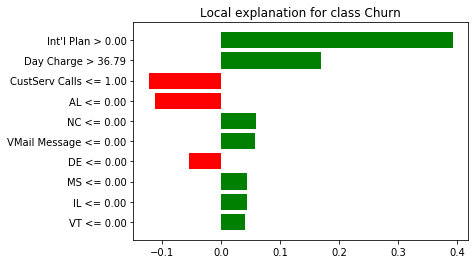

In [15]:
fig = exp.as_pyplot_figure()